In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#matplotlib.style.use('dark_background')

In [15]:
#Read in smaller dataframes

schoolrankings =  pd.read_csv('school ranking and income\SchoolRankingIncome.csv')
populationData =  pd.read_csv('ages\populationData.csv')
schoolOffers   =  pd.read_csv(r'School Offers\bigDataset.csv')
progression    =  pd.read_csv(r'Tundra(progression_rates)\outputDataframe.csv') 
rainfall       =  pd.read_csv('./weather/data/rainfall.csv')

In [16]:
# Combine to master df
master_df = schoolrankings.merge(populationData, how='outer', left_on='LA code', right_on='LA code')
master_df = master_df.merge(schoolOffers, how='outer', left_on='LA code', right_on='LA code')
master_df = master_df.merge(progression, how='outer', left_on='LA code', right_on='LA code')
master_df = master_df.merge(rainfall, how='outer', left_on='LA code', right_on='LA code')
master_df.drop(['loneills_2018'], inplace=True, axis = 1)

print(master_df.loc[master_df['LA code'] == 'E06000058'])

      LA code  Ofsted Avg  lonely_avg  KS2 metrics PCA  GDHI income index  \
54  E06000058    3.066667         NaN     -7386.807079              100.7   

                                LA name  LA flow rate  All Ages  meds  old%  \
54  Bournemouth, Christchurch and Poole           inf       NaN   NaN   NaN   

    ...  FSM Eligible %  <2 A levels  < AAB  perm_excl_rate  \
54  ...             NaN          NaN    NaN             NaN   

    Unsuccessful Appeals  % of ppl not doing degrees  progression_rate  \
54                   NaN                         NaN               NaN   

    total_pop  Unnamed: 0  Average Rainfall (June, mm)  
54        NaN         NaN                          NaN  

[1 rows x 29 columns]


In [17]:
# Sort out mismatched/old/new LA codes
def splitarea(master_df,areaToSplit,listofnewareas):
    for area in listofnewareas:
        master_df = pd.concat((master_df,master_df.loc[master_df['LA code'] == areaToSplit].copy().replace(areaToSplit,area)),axis=0,join='outer')
    return master_df     

def splitareaRange(master_df,areaToSplit,startnum,endnum):
    listofnewareas = []
    for i in range(startnum,endnum+1):
        listofnewareas.append('E070000'+str(i))
    return splitarea(master_df,areaToSplit,listofnewareas)

def splitareaRange3(master_df,areaToSplit,startnum,endnum):
    listofnewareas = []
    for i in range(startnum,endnum+1):
        listofnewareas.append('E07000'+str(i))
    return splitarea(master_df,areaToSplit,listofnewareas)

#Bournemouth, Christchurch and Poole fix
master_df = splitarea(master_df, 'E06000058',['E07000048','E06000028','E06000029'])

#fix dorset
master_df = splitarea(master_df, 'E06000059',['E07000049','E07000050','E07000053','E07000051','E07000052'])


#Fixes northumberland
master_df = splitarea(master_df,'E06000048',['E06000057'])
 #Fixes gateshead
master_df = splitarea(master_df,'E08000020',['E08000037'])

#Split up buckinghamshire
master_df = splitarea(master_df,'E10000002',['E07000004','E07000005','E07000006','E07000007'])

#cambridgeshire
master_df = splitarea(master_df,'E10000003',['E07000008','E07000009','E07000010','E07000011','E07000012'])

#cumbria
master_df = splitarea(master_df,'E10000006',['E07000026','E07000027','E07000028','E07000029','E07000030','E07000031'])


#derbyshire
master_df = splitarea(master_df,'E10000007',['E07000032','E07000033','E07000034','E07000035','E07000036','E07000037','E07000038','E07000039'])

#devon
master_df = splitarea(master_df,'E10000008',['E07000040','E07000041','E07000042','E07000043','E07000044','E07000045','E07000046','E07000047'])

#eastsussex
master_df = splitareaRange(master_df,'E10000011',61,65)

#essex
master_df = splitareaRange(master_df,'E10000012',66,77)

#Gloucestershire
master_df = splitareaRange(master_df,'E10000013',78,83)

#Hampshire
master_df = splitareaRange(master_df,'E10000014',84,94)

#Hertfordshire
master_df = splitareaRange(master_df,'E10000015',95,99)
master_df = splitareaRange3(master_df,'E10000015',100,104)
master_df = splitareaRange3(master_df,'E10000015',240,243)

#Kent
master_df = splitareaRange3(master_df,'E10000016',105,116)

#Lancashire
master_df = splitareaRange3(master_df,'E10000017',117,128)

#Leicestershire
master_df = splitareaRange3(master_df,'E10000018',129,135)

#Lincolnshire
master_df = splitareaRange3(master_df,'E10000019',136,142)

master_df = splitareaRange3(master_df,'E10000020',143,149)
master_df = splitareaRange3(master_df,'E10000021',150,156)
master_df = splitareaRange3(master_df,'E10000023',163,169)
master_df = splitareaRange3(master_df,'E10000024',170,176)
master_df = splitareaRange3(master_df,'E10000025',177,181)

master_df = splitareaRange3(master_df,'E10000027',187,191)
master_df = splitareaRange3(master_df,'E10000027',246,246)

master_df = splitareaRange3(master_df,'E10000028',192,199)

master_df = splitareaRange3(master_df,'E10000029',200,206)
master_df = splitareaRange3(master_df,'E10000029',244,245)

master_df = splitareaRange3(master_df,'E10000030',207,217)
master_df = splitareaRange3(master_df,'E10000031',218,222)
master_df = splitareaRange3(master_df,'E10000032',223,229)
master_df = splitareaRange3(master_df,'E10000034',234,239)

master_df = master_df.groupby('LA code').max().reset_index()
#Combine the above fixes

#remove rows without loneliness data
master_df = master_df.loc[master_df['lonely_avg'].notna()]

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_3972/3407037155.py:95: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  master_df = master_df.groupby('LA code').max().reset_index()


In [18]:
master_df.to_csv('master_df.csv')
master_df

,LA code,Ofsted Avg,lonely_avg,KS2 metrics PCA,GDHI income index,LA flow rate,All Ages,meds,old%,young%,...,FSM Eligible %,<2 A levels,< AAB,perm_excl_rate,Unsuccessful Appeals,% of ppl not doing degrees,progression_rate,total_pop,Unnamed: 0,"Average Rainfall (June, mm)"
0,E06000001,3.000000,-0.542761,-22376.054139,NaN,0.006386,7819.666667,40.914654,0.192425,0.291151,...,25.797120,29.545,89.831,7.240653,75.0,53.4,0.389333,5480.0,74.0,88.6
1,E06000002,2.955556,1.316155,-16308.990169,NaN,0.009087,7472.833333,38.022965,0.173324,0.325616,...,24.189824,36.743,90.881,17.357524,78.3,46.1,0.413947,7890.0,75.0,94.0
2,E06000003,2.791667,0.649266,-18159.719122,76.2,0.006610,7222.526316,44.315926,0.227442,0.272533,...,17.971133,23.263,86.907,26.902558,58.2,23.0,0.374421,7550.0,76.0,89.0
3,E06000004,3.085714,0.635474,-11390.336475,79.3,0.006535,8225.791667,41.914379,0.198321,0.282187,...,16.438313,22.014,81.560,12.734798,71.0,22.7,0.427333,10385.0,77.0,66.6
4,E06000005,2.894737,0.967079,-22128.626436,82.8,0.007193,7160.133333,42.795048,0.204487,0.277309,...,16.558996,23.524,82.458,6.176271,71.2,35.8,0.390533,5635.0,95.0,71.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,E09000029,3.160000,0.922554,-14223.879842,135.4,0.011007,8654.458333,39.681522,0.155136,0.299827,...,11.105043,12.304,68.218,5.073838,92.9,21.9,0.519875,10515.0,31.0,71.2
336,E09000030,3.135922,-1.569304,-6292.946064,121.8,0.006309,10374.031250,31.565589,0.068543,0.328514,...,33.606923,26.226,90.029,1.590186,72.1,21.8,0.539094,11430.0,10.0,101.4
337,E09000031,3.064935,-0.738428,-3264.472408,113.0,0.012856,9890.714286,35.840782,0.113602,0.314123,...,14.011779,24.884,93.340,6.893699,76.2,28.9,0.539679,13365.0,32.0,83.1
338,E09000032,3.241379,0.855884,-12293.347382,188.9,0.008486,8911.756757,33.882615,0.098509,0.278210,...,15.470621,23.902,85.830,5.655267,90.6,22.6,0.578730,8240.0,11.0,95.5


<AxesSubplot:>

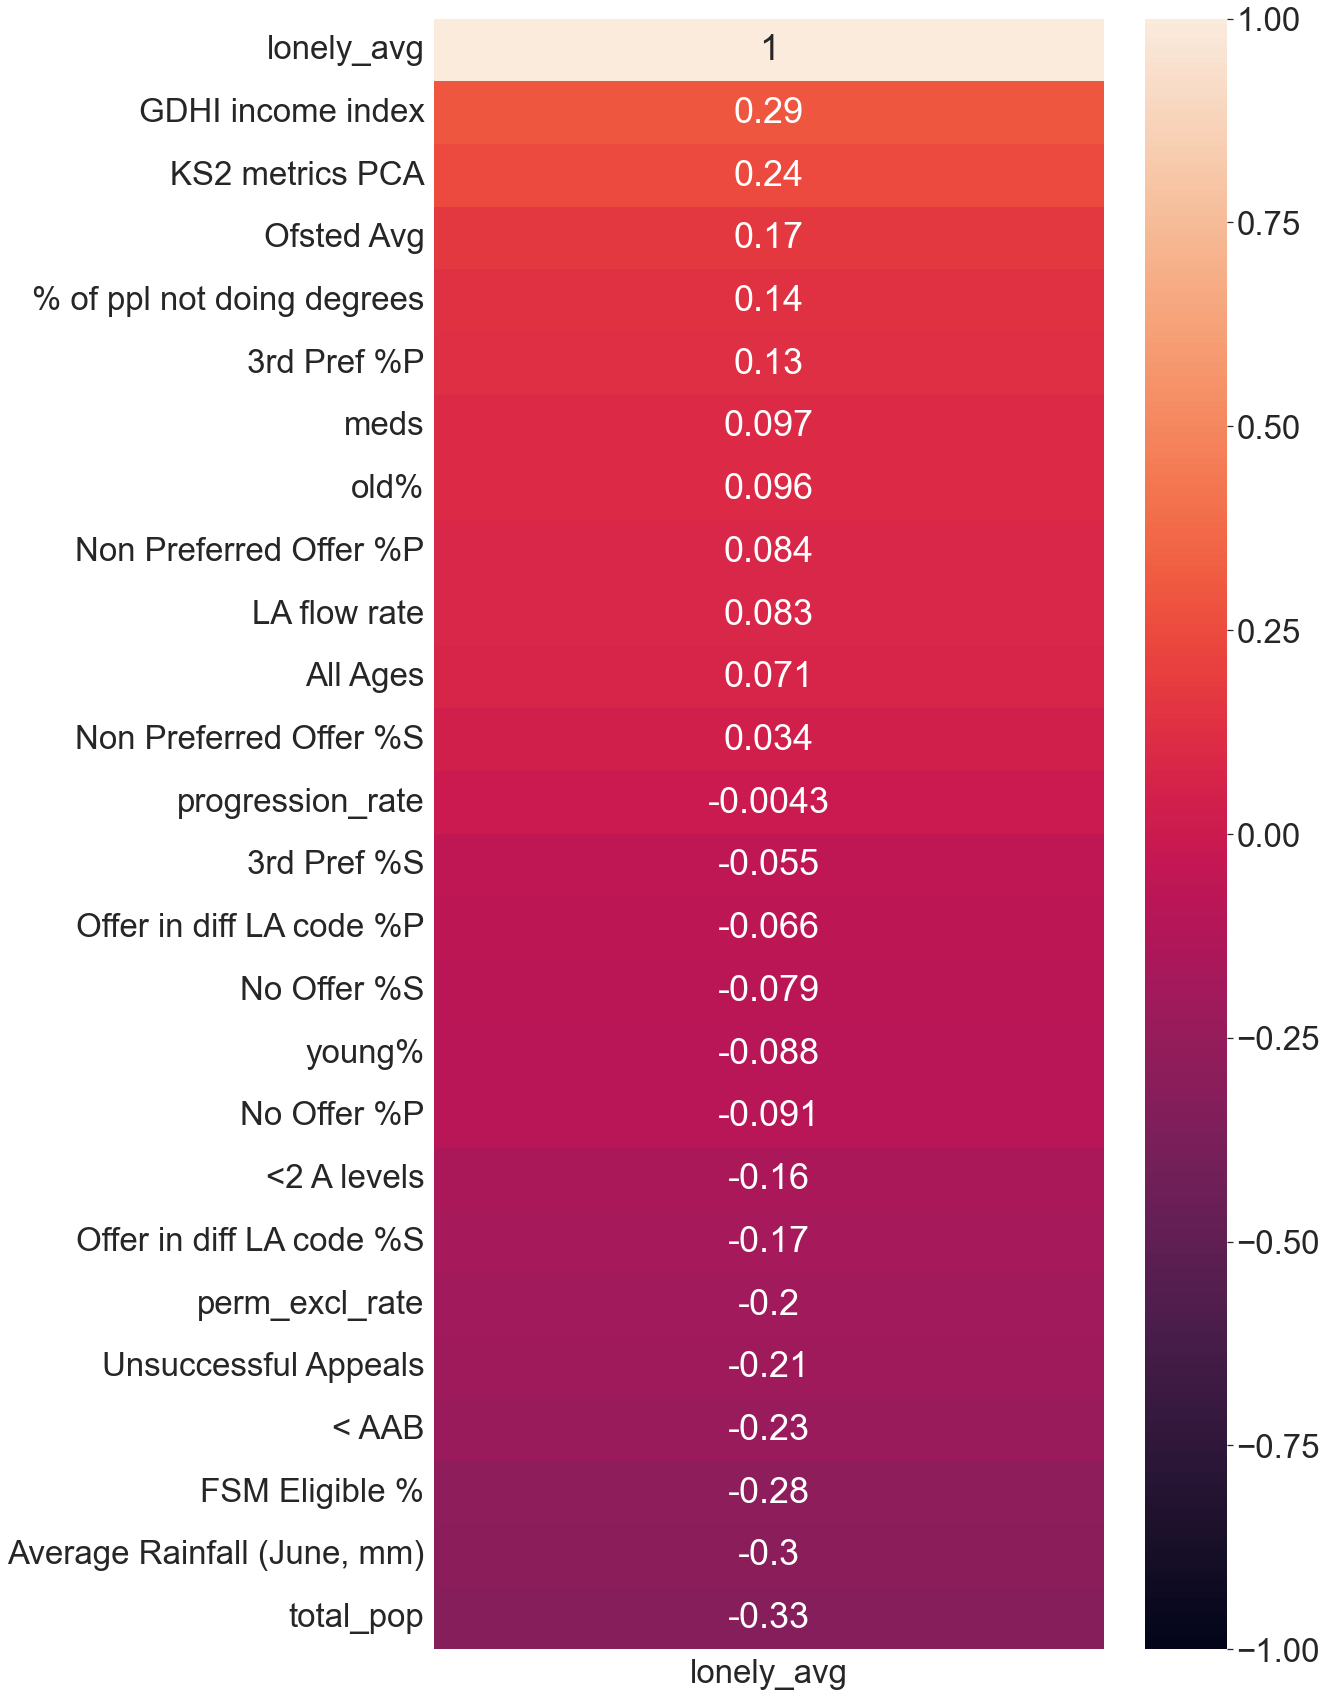

In [23]:
plt.figure(figsize=(15,30))
#sns.heatmap(master_df.drop(columns='LA code').corr(), vmin=-1, vmax=1, annot=True)
sns.set(font_scale = 3)
sns.heatmap(master_df.drop(columns=['LA code','Unnamed: 0']).corr()[['lonely_avg']].sort_values(by='lonely_avg', ascending=False), vmin=-1, vmax=1, annot=True)

In [20]:

#sns.pairplot(master_df)